In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import pandas as pd
import numpy as np
# matplotlib is the Python library for drawing diagrams
import matplotlib.pylab as plt
%matplotlib inline
# set the size of the diagrams
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5

## Dataprep

In [3]:
# url = 'https://raw.githubusercontent.com/DeclercqEmiel/BP-csvs/master/googleStock.csv'
# ts = pd.read_csv(url)

In [4]:
# ts = ts[['Date','Open']]
# ts = ts.rename(columns={"Open": "Stock"})
# # tsuv['Date'] = pd.to_datetime(tsuv['Date'])

In [5]:
# ts['Date'] = ts['Date'].str[:10]
# ts = ts.drop_duplicates('Date')
# ts['Date'] = ts['Date'].str[:7]
# ts = ts.groupby('Date').mean()

In [6]:
# ts.to_csv('tsuv.csv')

In [7]:
# convert the month-string to a date and use that date as an index
url = 'https://raw.githubusercontent.com/DeclercqEmiel/BP-csvs/master/tsuv.csv'
parser = lambda x: pd.datetime.strptime(x,'%Y-%m')
tsuv = pd.read_csv(url, parse_dates=['Date'], index_col='Date',date_parser=parser)
print(tsuv.head())

                Stock
Date                 
2004-08-01  52.502651
2004-09-01  55.779496
2004-10-01  75.960519
2004-11-01  88.750200
2004-12-01  90.359719


C:\Users\Emiel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
tsuv

,Stock
Date,
2004-08-01,52.502651
2004-09-01,55.779496
2004-10-01,75.960519
2004-11-01,88.750200
2004-12-01,90.359719
...,...
2020-03-01,1183.330916
2020-04-01,1234.962623
2020-05-01,1377.211841


In [9]:
tsuv = tsuv.sort_values('Date')

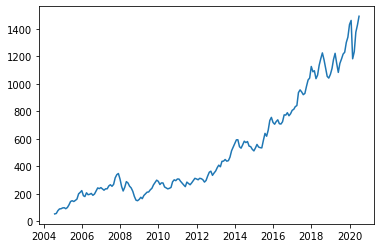

In [10]:
plt.plot(tsuv)

In [11]:
# Define train and testset
X = tsuv.values
testSize = 24
size = len(tsuv.values)
train, test = X[:-testSize], X[-testSize:]  # first 2/3 = training set, remaining 1/3 = test set

In [12]:
train

array([[  52.50265122],
       [  55.77949648],
       [  75.96051933],
       [  88.75019976],
       [  90.35971868],
       [  96.3595707 ],
       [  97.52419274],
       [  90.50893232],
       [  99.0888291 ],
       [ 118.35826948],
       [ 143.19486168],
       [ 148.73600235],
       [ 142.7871897 ],
       [ 151.1494089 ],
       [ 160.731111  ],
       [ 198.60368057],
       [ 209.35575938],
       [ 222.63202135],
       [ 184.99448984],
       [ 179.15197361],
       [ 206.58960037],
       [ 192.55824491],
       [ 195.52734173],
       [ 201.80807405],
       [ 188.21885752],
       [ 197.60159145],
       [ 218.75958186],
       [ 241.91372467],
       [ 236.9496049 ],
       [ 244.2310615 ],
       [ 234.05297374],
       [ 225.41916455],
       [ 235.5769981 ],
       [ 235.31480136],
       [ 256.34653367],
       [ 265.14497952],
       [ 254.05404796],
       [ 267.98211516],
       [ 315.33067261],
       [ 338.64922943],
       [ 347.0297485 ],
       [ 306.722

In [13]:
ts = tsuv.squeeze()

In [14]:
tsuv

,Stock
Date,
2004-08-01,52.502651
2004-09-01,55.779496
2004-10-01,75.960519
2004-11-01,88.750200
2004-12-01,90.359719
...,...
2020-03-01,1183.330916
2020-04-01,1234.962623
2020-05-01,1377.211841


### Define testing methods

In [15]:
def calc_rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100

### ARIMA

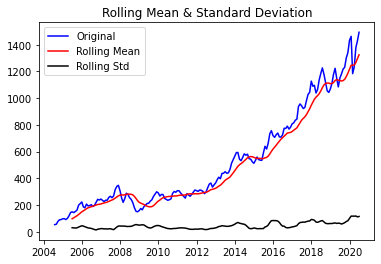

In [16]:
# We check how stationary a dataset is first because most models assume that datasets are stationary
# Stationarity is very strictly defined but for this practical example we can assume the time series is stationary
# if we have a constant mean and variance

def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
test_stationarity(tsuv)

The variance seems to be pretty constant but the mean is heavily rising so we can conclude this data is not stationary

In [17]:
# We can calculate the difference between the original values and the moving average to make the data more stationary
moving_avg = tsuv.rolling(12).mean()
ts_moving_avg_diff = tsuv - moving_avg
ts_moving_avg_diff.head(24)

,Stock
Date,
2004-08-01,NaN
2004-09-01,NaN
2004-10-01,NaN
2004-11-01,NaN
2004-12-01,NaN
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN


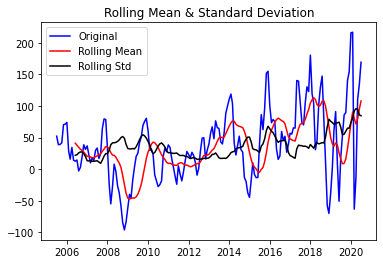

In [18]:
# Lets drop these NaN values and check the plots to test stationarity by 
# using the function "test_stationarity" we defined earlier
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_moving_avg_diff)

Even though this still varies quite a bit its a way better dataset then the previous one so using differencing on the rolling average will increase the stationarity of the dataset 

We can reduce the stationarity even futher by **differencing**, which means subtracting each value from a timestep from the value of a subsequent timestep

In [19]:
ts

Date
2004-08-01      52.502651
2004-09-01      55.779496
2004-10-01      75.960519
2004-11-01      88.750200
2004-12-01      90.359719
                 ...     
2020-03-01    1183.330916
2020-04-01    1234.962623
2020-05-01    1377.211841
2020-06-01    1430.064559
2020-07-01    1493.339996
Name: Stock, Length: 192, dtype: float64

Date
2004-08-01    52.502651
2004-09-01    55.779496
2004-10-01    75.960519
2004-11-01    88.750200
2004-12-01    90.359719
Name: Stock, dtype: float64

Date
2004-08-01          NaN
2004-09-01    52.502651
2004-10-01    55.779496
2004-11-01    75.960519
2004-12-01    88.750200
Name: Stock, dtype: float64

Date
2004-08-01          NaN
2004-09-01     3.276845
2004-10-01    20.181023
2004-11-01    12.789680
2004-12-01     1.609519
Name: Stock, dtype: float64


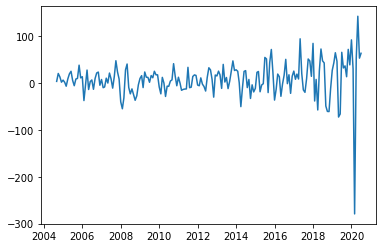

In [20]:
print(ts.head(5))
print()
print(ts.shift(1).head(5))

# ts.shift(1) return the previous value in the series
ts_diff = ts - ts.shift(1)  
print()
print(ts_diff.head(5))
plt.plot(ts_diff)

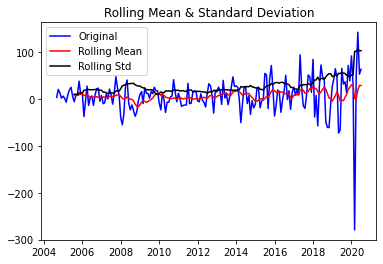

In [21]:
# subtracting from previous values causes NaN-values at the beginning
ts_diff.dropna(inplace=True)  
test_stationarity(ts_diff)

Now we can consider this a stationary timeseries

Now we can fit the time series to our ARIMA model

C:\Users\Emiel\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Emiel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Emiel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


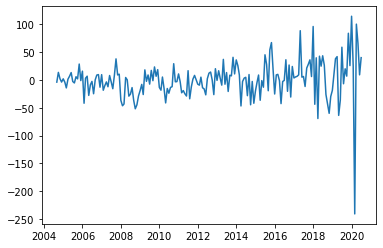

                0
count  191.000000
mean     0.028884
std     33.875604
min   -240.704146
25%    -15.864535
50%      0.248791
75%     12.774970
max    114.537591


In [22]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(tsuv, order=(6,1,1))  # MS = month start
model_fit = model.fit(disp=0)
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.show()
print(residuals.describe())

In [66]:
from math import sqrt
import math
from sklearn.metrics import mean_squared_error,r2_score

history = [x for x in train]
trainAndPredictions = train
predictions = list()

# test extra parameter in forecast
model = ARIMA(history, order=(3,1,1))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(steps = len(test))[0]

print()
rmspe_ARIMA = calc_rmspe(test.flatten(), predictions)
print('Test RMSPE: %.3f' % rmspe_ARIMA)
r2_ARIMA = r2_score(test,predictions)
print('R square: ' + str(r2_ARIMA))  


Test RMSPE: 8.151
R square: 0.4103283236152291


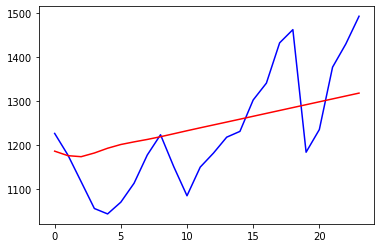

In [67]:
# plot
plt.plot(test,color='blue')
plt.plot(predictions, color='red')
plt.show()

In [68]:
# from sklearn.metrics import mean_squared_error,r2_score
# import itertools
# import warnings
# import sys


# # Define the p, d and q parameters to take any value between 0 and 2
# p = d = q = range(0, 6)

# # Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))
# best_pdq = pdq
# best_r2 = -2
# warnings.filterwarnings("ignore") # specify to ignore warning messages
# for param in pdq:
#     history = [x for x in train]
#     predictions = list()
#     print(param)
#     try:   # some parametercombinations might lead to crash, so catch exceptions and continue
#         for t in range(len(test)):
#             model = ARIMA(history, order=param)
#             model_fit = model.fit(disp=0)
#             output = model_fit.forecast()
#             yt = output[0]
#             predictions.append(yt)
#             obs = test[t]
#             history.append(yt)
#         r2 = r2_score(test,predictions)
        
#         print('R square: ' + str(r2))    
#         if r2 > best_r2:
#             best_r2 = r2
#             best_pdq = param
#             best_predictions = predictions
#             best_rmse = sqrt(mean_squared_error(test, predictions))
            
#     except Exception as e:
#         print(e)
#         continue
   
# # plot
# print('Best R2 = ' + str(best_r2))
# print('Best rmse = ' + str(best_rmse))
# print(best_pdq)
# plt.plot(test,color='blue')
# plt.plot(best_predictions, color='red')
# plt.show()

In [69]:
# Negative r2 means its a bad model and fits the data worse than a horizonal line

In [70]:
# Test possible parameter combinations with try catch

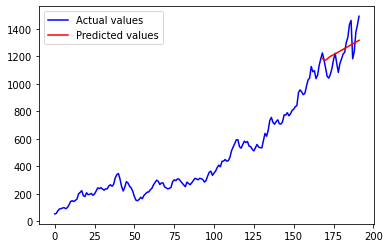

In [71]:
def full_graph(predicted):
    predictionsArray = np.asarray(predicted).reshape(testSize) 
    zerosArray = np.zeros(tsuv.values.size-len(predictionsArray.flatten()))
    cleanPrediction = pd.Series(np.concatenate((zerosArray,predictionsArray))).replace(0,np.NaN)

    # plot
    plt.plot(tsuv.values,color='blue',label='Actual values')
    plt.plot(cleanPrediction, color='red',label='Predicted values')
    plt.legend()

    plt.show()
full_graph(predictions)

### LSTM

In [72]:
# Fit data to LSTM multi step prediction because this is a chained one step prediction

In [73]:
import numpy as np

# univariate multi-step encoder-decoder convlstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D

def calc_rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100

def monitor(name, variable):
    print(name)
    print(type(variable))
    print(variable)
    print()

# split a univariate dataset into train/test sets
def split_dataset(data):
    n_test_entries = 24
    # split into standard years
    train, test = data[:-n_test_entries], data[-n_test_entries:]
    # restructure into windows of yearly data
    train = array(split(train, len(train)/12))
    test = array(split(test, len(test)/12))
    return train, test

# evaluate one or more weekly forecasts against expected values
# MABEY?
# def evaluate_forecasts(actual, predicted):
#     monitor("Actual", actual)
#     monitor("Predicted",predicted)
#     print()
    
    
#     scores = list()
#     # calculate an RMSE score for each day
#     for i in range(actual.shape[1]):
#         # calculate rmspe
#         rmspe = calc_rmspe(actual[:, i], predicted[:, i])
#         # store
#         scores.append(rmspe)
        
# #     # calculate overall RMSE
# #     s = 0
# #     for row in range(actual.shape[0]):
# #         for col in range(actual.shape[1]):
# #             s += (actual[row, col] - predicted[row, col])**2
#     score = calc_rmspe(actual.flatten(),predicted.flatten())
#     return score, scores

# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=12):
    # flatten data
    print(train.shape)
    data = train.reshape((train.shape[0]*train.shape[1]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            x_input = data[in_start:in_end]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end])
        # move along one time step
        in_start += 1
    return array(X), array(y)

# train the model
def build_model(train, n_steps, n_length, n_input):
    # prepare data
    train_x, train_y = to_supervised(train, n_input)
    # define parameters
    verbose, epochs, batch_size = 0, 20, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # reshape into subsequences [samples, time steps, rows, cols, channels]
    train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
    # reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))

    # define model
    model = Sequential()
    model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
    model.add(Flatten())
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # plot history
    pyplot.title('Error per epoch')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.legend()
    pyplot.show()
    return model

# make a forecast
def forecast(model, history, n_steps, n_length, n_input):
    # flatten data
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1]))
    # retrieve last observations for input data
    input_x = data[-n_input:]
    # reshape into [samples, time steps, rows, cols, channels]
    input_x = input_x.reshape((1, n_steps, 1, n_length, 1))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

# evaluate a single model
def evaluate_model(train, test, n_steps, n_length, n_input):
    # fit model
    model = build_model(train, n_steps, n_length, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_steps, n_length, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    score = calc_rmspe(test[:, :].flatten(), predictions.flatten()) #evaluate_forecasts(test[:, :, 0], predictions)
    X = range(0,24)
    pyplot.title('Comparing actual results with predictions')
    pyplot.plot(X, test[:, :].flatten(), marker='o', label='Actual')
    pyplot.plot(X, predictions.flatten(), marker='o', label='Predictions')
    pyplot.legend()
    pyplot.show()
    return score, r2_score(test[:, :].flatten(), predictions.flatten()), predictions

In [74]:
# load the new file
dataset = ts
data = dataset.values

In [75]:
# split into train and test
train, test = split_dataset(data)

In [76]:
dataset.values.shape

(192,)

In [77]:
# define the number of subsequences and the length of subsequences
n_steps, n_length = 2, 12

(14, 12)


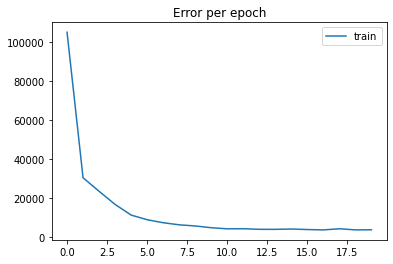

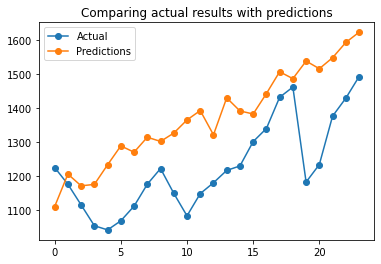

In [78]:
# define the total days to use as input
n_input = n_length * n_steps
rmspe_LSTM, r2_LSTM, predictions = evaluate_model(train, test, n_steps, n_length, n_input)

In [90]:
print()
rmspe_LSTM = calc_rmspe(test.flatten(), predictions.flatten())
print('Test RMSPE: %.3f' % rmspe_LSTM)
r2_LSTM = r2_score(test.flatten(),predictions.flatten())
print('R square: ' + str(r2_LSTM))  


Test RMSPE: 14.866
R square: -0.8030838785570944


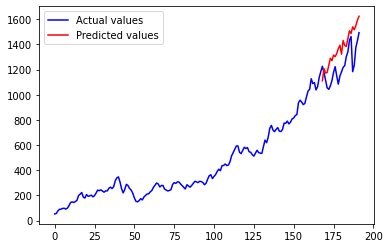

In [91]:
full_graph(predictions)

### Polynomiale Regressie

In [92]:
# Create an array with ints to provide index/y values

X_train = pd.DataFrame(range(0,ts.shape[0]))[:-testSize]
X_test = pd.DataFrame(range(0,ts.shape[0]))[-testSize:]

y_train = ts.reset_index().drop(columns='Date').squeeze()[:-testSize]
y_test = ts.reset_index().drop(columns='Date').squeeze()[-testSize:]

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Prepare variables that keep track of the best fitting polynomial
BestR2 = -float('inf')
BestRMSPE = float('inf')
BestIR2 = 1
BestIRMSPE = 1



# Loop over polynomials from degrees 1 to 10 and use polynomial that fits best according to the 
for i in range(1,10):
    
    # Create PolynomialFeatures from the first degree
    poly = PolynomialFeatures(degree=i)
    
    # Fit the inputdata from your trainingsset to the polynomial
    X_train_transform = poly.fit_transform(X_train)
    
    # Create the model and fit it to the transformed inputdata and your expected outputdata from the trainingsdata
    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    # Transform the inputdata from your 
    X_test_transform = poly.fit_transform(X_test)
    y_predict_test = model.predict(X_test_transform)    
    
    # Calculate errors
    RMSPE_test = calc_rmspe(y_test, y_predict_test)

    # Print errors
    print('RMSPE for i = ' + str(i) + ' is ' + str(RMSPE_test) )
    print()
    
    # Update best fit
    if BestRMSPE > RMSPE_test:
        BestRMSPE = RMSPE_test
        BestRMSPEi = i
        
# Conclude best results
# print('Best i value according to r2 is '+str(BestR2i)+' with r2: '+str(BestR2))
print('Best i value according to RMSPE is '+str(BestRMSPEi)+' with RMSPE: '+str(BestRMSPE))

RMSPE for i = 1 is 26.093983452526892

RMSPE for i = 2 is 6.684135141555307

RMSPE for i = 3 is 20.32066452652928

RMSPE for i = 4 is 10.205784633354162

RMSPE for i = 5 is 30.24748900535556

RMSPE for i = 6 is 52.78362103025883

RMSPE for i = 7 is 18.65914087855028

RMSPE for i = 8 is 86.8089016538248

RMSPE for i = 9 is 199.95330568553456

Best i value according to RMSPE is 2 with RMSPE: 6.684135141555307


In [94]:
# Recreate best model
poly = PolynomialFeatures(degree=BestRMSPEi)
X_train_transform = poly.fit_transform(X_train)   
X_test_transform = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_transform,y_train)
y_predict = model.predict(X_test_transform)

In [95]:
X_train_transform.shape

(168, 3)

In [96]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_
    for i in range(0, len(model.coef_)):
        result += model.coef_[i] * x**i 
    return result

In [97]:
rmspe_PR = calc_rmspe(y_test, y_predict)
r2_PR = r2_score(y_test, y_predict)

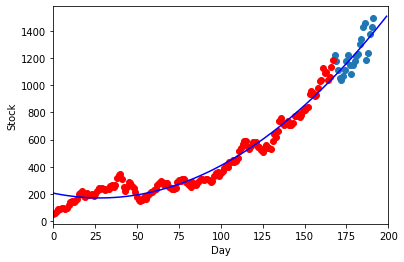

In [98]:
# Plot the dataset
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train, color='red')
plt.xlim([0, 200])
plt.xlabel('Day')
plt.ylabel('Stock')

# Plot the polynomial
t1 = np.arange(0, 200, 1)
plt.plot(t1, p(t1), color='blue')
plt.show()


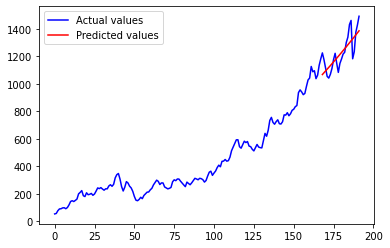

In [99]:
full_graph(y_predict)

### Evaluation

In [100]:
print('ARIMA rmspe:\t %.3f' % rmspe_ARIMA)
print('ARIMA r2:\t %.3f' % r2_ARIMA)
print()
print('LSTM rmspe:\t %.3f' % rmspe_LSTM)
print('LSTM r2:\t %.3f' % r2_LSTM)
print()
print('PR rmspe:\t %.3f' % rmspe_PR)
print('PR r2:\t\t %.3f' % r2_PR)

ARIMA rmspe:	 8.151
ARIMA r2:	 0.410

LSTM rmspe:	 14.866
LSTM r2:	 -0.803

PR rmspe:	 6.684
PR r2:		 0.592
